<a href="https://colab.research.google.com/github/vimalthomas/deeplearning/blob/main/MNST_Dataloader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import files

uploaded = files.upload()  # This will prompt you to select and upload the files


Saving train-labels.idx1-ubyte to train-labels.idx1-ubyte
Saving train-images.idx3-ubyte to train-images.idx3-ubyte
Saving t10k-labels.idx1-ubyte to t10k-labels.idx1-ubyte
Saving t10k-images.idx3-ubyte to t10k-images.idx3-ubyte


In [7]:
import os

# List files in the Colab working directory
os.listdir()


['.config',
 'train-images.idx3-ubyte',
 't10k-images.idx3-ubyte',
 'archive.zip',
 'train-labels.idx1-ubyte',
 'mnist',
 't10k-labels.idx1-ubyte',
 'sample_data']

In [9]:
import numpy as np

def load_mnist_images(filename):
    with open(filename, "rb") as f:
        f.read(16)  # Skip the header (first 16 bytes for images)
        data = np.fromfile(f, dtype=np.uint8)
    return data.reshape(-1, 28 * 28) / 255.0  # Normalize pixel values to [0,1]

def load_mnist_labels(filename):
    with open(filename, "rb") as f:
        f.read(8)  # Skip the header (first 8 bytes for labels)
        labels = np.fromfile(f, dtype=np.uint8)
    return labels

# Load dataset from your uploaded files
train_x = load_mnist_images("train-images.idx3-ubyte")
train_y = load_mnist_labels("train-labels.idx1-ubyte")
test_x = load_mnist_images("t10k-images.idx3-ubyte")
test_y = load_mnist_labels("t10k-labels.idx1-ubyte")

# Print dataset shapes
print(f"Train Images Shape: {train_x.shape}, Train Labels Shape: {train_y.shape}")
print(f"Test Images Shape: {test_x.shape}, Test Labels Shape: {test_y.shape}")


Train Images Shape: (60000, 784), Train Labels Shape: (60000,)
Test Images Shape: (10000, 784), Test Labels Shape: (10000,)


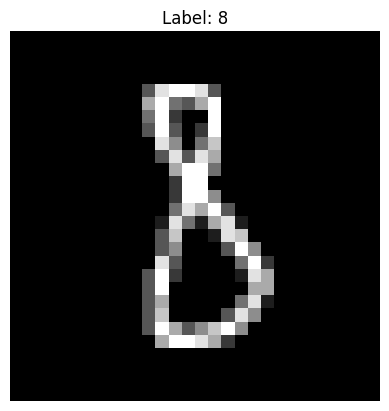

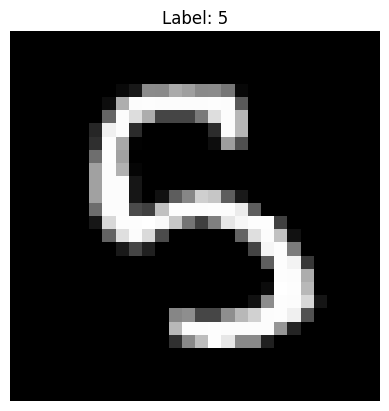

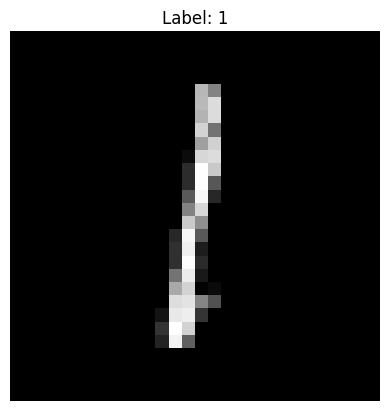

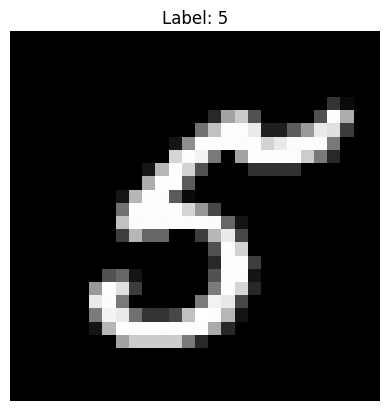

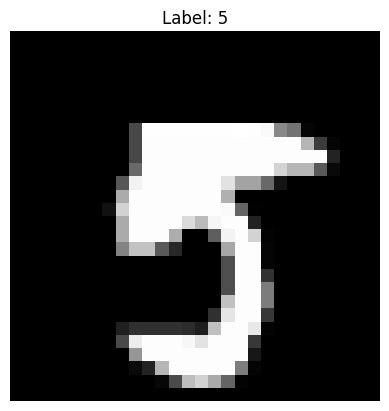

In [13]:
import matplotlib.pyplot as plt

# Function to visualize an image
def show_image(image_vector, label):
    image = image_vector.reshape(28, 28)  # Reshape from (784,) to (28,28)
    plt.imshow(image, cmap="gray")  # Display the image in grayscale
    plt.title(f"Label: {label}")  # Show the corresponding label
    plt.axis("off")  # Hide axes
    plt.show()

# Show 5 random images
num_samples = 5
indices = np.random.choice(len(train_x), num_samples, replace=False)  # Random indices

for i in indices:
    show_image(train_x[i], train_y[i])  # Show image with corresponding label


In [14]:
def one_hot_encode(labels, num_classes=10):
    return np.eye(num_classes)[labels]

# Convert labels
train_y_one_hot = one_hot_encode(train_y)
test_y_one_hot = one_hot_encode(test_y)

# Print an example
print(f"Example Label: {train_y[0]}, One-Hot: {train_y_one_hot[0]}")


Example Label: 5, One-Hot: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
